In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

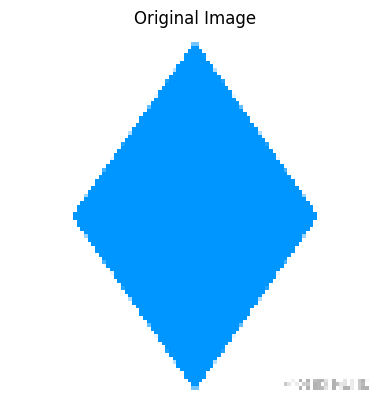

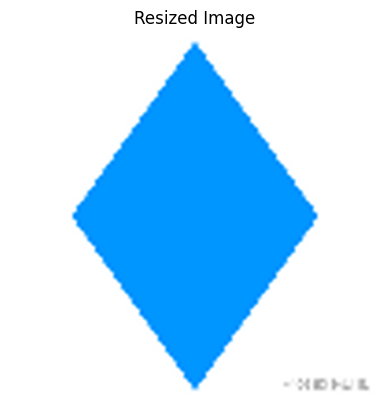

In [2]:
img = cv2.imread('9255.png')
# stretch the image
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

resized_img = cv2.resize(img, (1200, 1200), interpolation=cv2.INTER_CUBIC)
plt.figure()
plt.imshow(resized_img)
plt.title('Resized Image')
plt.axis('off')
plt.show()

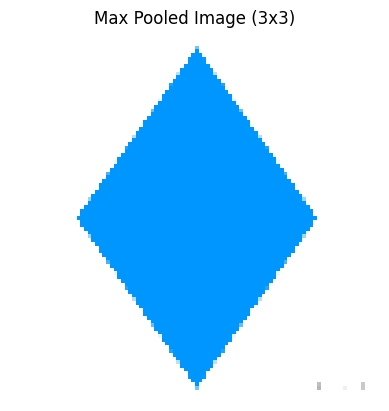

In [10]:
# Apply max pooling with kernel size 3x3
pooled_img = cv2.dilate(img, np.ones((2, 2), np.uint8))
plt.figure()
plt.imshow(pooled_img)
plt.title('Max Pooled Image (3x3)')
plt.axis('off')
plt.show()

Original image shape: (100, 100, 3)
Pooled image shape: (50, 50, 3)


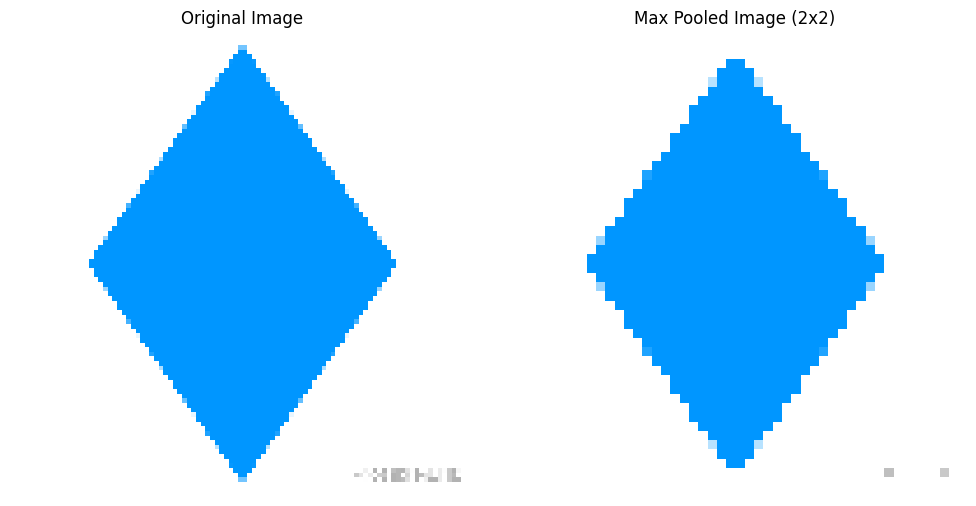

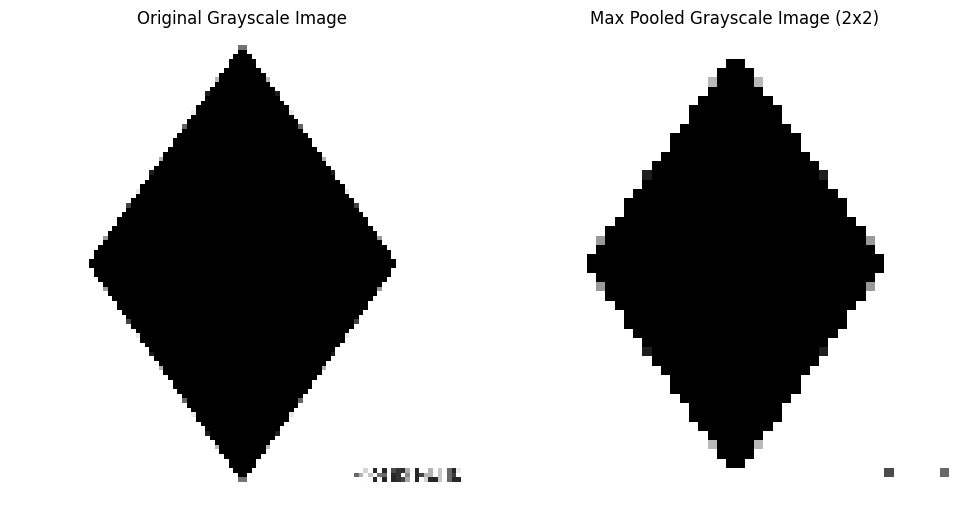

In [9]:
def max_pooling(image, pool_size=(2, 2)):
    """
    Performs max pooling on an image.

    Args:
        image (np.array): The input image (grayscale or multi-channel).
        pool_size (tuple): A tuple (pool_height, pool_width) representing
                           the size of the pooling window.

    Returns:
        np.array: The max-pooled image.
    """
    img_height, img_width = image.shape[:2]
    pool_height, pool_width = pool_size

    # Calculate output dimensions
    output_height = img_height // pool_height
    output_width = img_width // pool_width

    # Handle grayscale or color images
    if len(image.shape) == 2:  # Grayscale
        pooled_image = np.zeros((output_height, output_width), dtype=image.dtype)
        for i in range(output_height):
            for j in range(output_width):
                # Extract the window
                window = image[i * pool_height : (i + 1) * pool_height,
                               j * pool_width : (j + 1) * pool_width]
                # Take the maximum value in the window
                pooled_image[i, j] = np.max(window)
    else:  # Color (assuming BGR or RGB)
        num_channels = image.shape[2]
        pooled_image = np.zeros((output_height, output_width, num_channels), dtype=image.dtype)
        for c in range(num_channels):
            for i in range(output_height):
                for j in range(output_width):
                    window = image[i * pool_height : (i + 1) * pool_height,
                                   j * pool_width : (j + 1) * pool_width, c]
                    pooled_image[i, j, c] = np.max(window)
    return pooled_image

# --- Example Usage ---
# Create a dummy grayscale image
# dummy_image = np.array([
#     [10, 20, 30, 40],
#     [50, 60, 70, 80],
#     [90, 100, 110, 120],
#     [130, 140, 150, 160]
# ], dtype=np.uint8)

# Load a real image (make sure you have 'lena.jpg' or any image in your directory)


print(f"Original image shape: {img.shape}")

# Perform max pooling with a 2x2 pool size
pooled_image = max_pooling(img, pool_size=(2, 2))
print(f"Pooled image shape: {pooled_image.shape}")

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Max Pooled Image (2x2)")
plt.imshow(pooled_image)
plt.axis('off')

plt.tight_layout()
plt.show()

# You can also apply it to a grayscale version
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pooled_gray_image = max_pooling(gray_image, pool_size=(2, 2))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Max Pooled Grayscale Image (2x2)")
plt.imshow(pooled_gray_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()